In [18]:
from keras import layers, models
from tfreplknet import RepLKNetB224In1k, preprocess_input_bl

inputs = layers.Input(shape=(224, 224, 3), dtype='uint8')
outputs = layers.Lambda(preprocess_input_bl)(inputs)
outputs = RepLKNetB224In1k(include_top=False)(outputs)
outputs = layers.Dense(1, activation='sigmoid')(outputs)
model = models.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 lambda_4 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 replknet_b_224_in1k (Functi  (None, None, None, 1024)  79114112 
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 7, 7, 1)           1025      
                                                                 
Total params: 79,115,137
Trainable params: 78,840,193
Non-trainable params: 274,944
_________________________________________________________________


In [ ]:
# I have an input of shape (360, 256, 2)

In [19]:
# For each BatchNormalization layer in model.layers[-2].layers, set the momentum to 0.999
for layer in model.layers[-2].layers:
    if isinstance(layer, layers.BatchNormalization):
        layer.momentum = 0.999

(array([4., 7., 5., 3., 2., 6., 3., 9., 5., 5.]),
 array([3.3668001e-04, 8.4048055e-02, 1.6775943e-01, 2.5147080e-01,
        3.3518219e-01, 4.1889358e-01, 5.0260496e-01, 5.8631629e-01,
        6.7002767e-01, 7.5373906e-01, 8.3745044e-01], dtype=float32),
 <BarContainer object of 10 artists>)

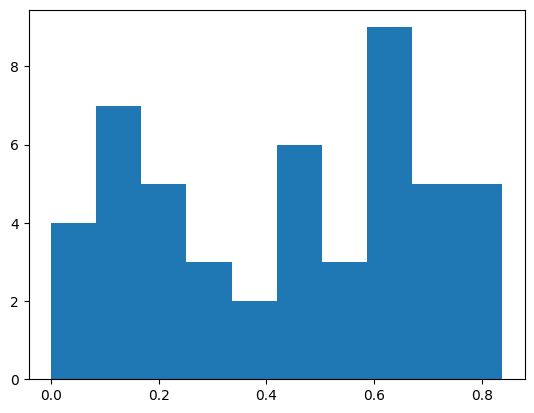

In [47]:
import tensorflow as tf
# GEnerate random number between 0 and 255 for each pixel in (1, 360, 360, 2)
x = tf.random.uniform((1, 224, 224, 3), minval=0, maxval=20055, dtype=tf.dtypes.int32)
y = model(x).numpy().flatten()
import matplotlib.pyplot as plt
plt.hist(y)


In [2]:
# efficientnetb0 model with input shape (360, 256, 2), and output shape (1,)    
import tensorflow as tf
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=True,
    weights=None,
    input_shape=(360, 256, 2),
    pooling=None,
    classes=1,
    classifier_activation='sigmoid',
)
inputs = tf.keras.Input(shape=(360, 256, 2))
x = base_model(inputs)
model = tf.keras.Model(inputs, x, name='EfficientNetB0 - depth {depth_min}')
model.summary()

/home/viktor/.local/lib/python3.10/site-packages/keras/applications/efficientnet.py:292: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 2 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "EfficientNetB0 - depth {depth_min}"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 360, 256, 2)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 1)                4050562   
                                                                 
Total params: 4,050,562
Trainable params: 4,008,541
Non-trainable params: 42,021
_________________________________________________________________


In [16]:
model.layers[-1].summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 360, 256, 2  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 360, 256, 2)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 360, 256, 2)  5          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

(array([1.29000e+02, 6.49100e+03, 3.88360e+04, 7.61940e+04, 1.62634e+05,
        2.21292e+05, 1.56056e+05, 6.61280e+04, 9.31500e+03, 2.05000e+02]),
 array([-0.93151957, -0.7532258 , -0.5749321 , -0.39663833, -0.2183446 ,
        -0.04005086,  0.13824287,  0.3165366 ,  0.49483037,  0.6731241 ,
         0.85141784], dtype=float32),
 <BarContainer object of 10 artists>)

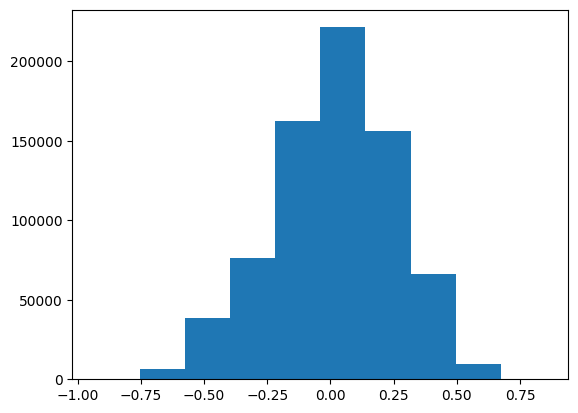

In [34]:
x = tf.random.uniform((1, 360, 256, 2), minval=0, maxval=255, dtype=tf.dtypes.float32)
# run on cpu
with tf.device('/cpu:0'):
    # run x through the model, 2 layers
    x = model.layers[0](x)
    x = model.layers[1].layers[0](x)
    x = model.layers[1].layers[1](x)
    x = model.layers[1].layers[2](x)
    x = model.layers[1].layers[3](x)
    x = model.layers[1].layers[4](x)
    x = model.layers[1].layers[5](x)
import matplotlib.pyplot as plt
plt.hist(x.numpy().flatten())

In [47]:
import pandas as pd
df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/data.csv")

df

,file,label,depth
0,/media/viktor/T7/gravitational-waves-kaggle-20...,1,14.395424
1,/media/viktor/T7/gravitational-waves-kaggle-20...,0,16.763065
2,/media/viktor/T7/gravitational-waves-kaggle-20...,1,23.607238
3,/media/viktor/T7/gravitational-waves-kaggle-20...,0,21.931825
4,/media/viktor/T7/gravitational-waves-kaggle-20...,0,9.933270
...,...,...,...
83995,/media/viktor/T7/gravitational-waves-kaggle-20...,1,11.677980
83996,/media/viktor/T7/gravitational-waves-kaggle-20...,1,22.839463
83997,/media/viktor/T7/gravitational-waves-kaggle-20...,1,19.598233
83998,/media/viktor/T7/gravitational-waves-kaggle-20...,1,13.881928


In [60]:

# df["file"] = df["file"].str.replace("max_time_2_mean", "max_time_2_mean_TMP")

# take rows with depth smaller than 20
df = df[df["depth"] < 10+2].reset_index(drop=True)
df = df[df["depth"] > 10].reset_index(drop=True)
names = df["file"].unique()
from sklearn.model_selection import train_test_split
train_names, test_names = train_test_split(names, test_size=0.1, random_state=42)

# create df_train and df_test dataframes
df_train = df[df["file"].isin(train_names)]
df_test = df[df["file"].isin(test_names)]


# Get all the "file" column values into a list, where label is True
signal_data_train = df_train[df_train["label"] == 1]["file"].tolist()
signal_data_test = df_test[df_test["label"] == 1]["file"].tolist()
# Get all the "file" column values into a list, where label is False
noise_data_train = df_train[df_train["label"] == 0]["file"].tolist()
noise_data_test = df_test[df_test["label"] == 0]["file"].tolist()

train_files = signal_data_train  + noise_data_train
test_files = signal_data_test + noise_data_test

# shuffle train_files and test_files  in the same way
import random
random.seed(42)
random.shuffle(train_files)
random.shuffle(test_files)

# Create labels for train and test data
train_labels = df_train[df_train["label"] == 1]["label"].tolist() + df_train[df_train["label"] == 0]["label"].tolist()
test_labels = df_test[df_test["label"] == 1]["label"].tolist() + df_test[df_test["label"] == 0]["label"].tolist()



['/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/generated-data/signals/amplitudes_ae62f85b5_10.909597452954603_True.npy',
 '/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/generated-data/signals/amplitudes_7f8643aad_11.065676618459413_True.npy',
 '/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/generated-data/signals/amplitudes_631572d5d_11.230043742761795_True.npy',
 '/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/generated-data/signals/amplitudes_51432e60b_11.754687708683454_True.npy',
 '/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/generated-data/signals/amplitudes_ab26ca28c_11.869723254872115_True.npy',
 '/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/generated-data/signals/amplitudes_277b3de70_10.460977842113213_True.npy',
 '/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/generated-data/signals/amplitudes_bd1c7789c_10.660756375988